In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

In [3]:
x_train = np.loadtxt('input.csv',delimiter =',')
y_train = np.loadtxt('labels.csv',delimiter=',')
x_test = np.loadtxt('input_test.csv',delimiter=',')
y_test = np.loadtxt('labels_test.csv',delimiter=',')

In [4]:
print("shape of x_train" , x_train.shape)
print("shape of x_train" , y_train.shape)
print("shape of x_train" , x_test.shape)
print("shape of x_train" , x_test.shape)

shape of x_train (2000, 30000)
shape of x_train (2000,)
shape of x_train (400, 30000)
shape of x_train (400, 30000)


In [5]:
x_train = x_train.reshape(len(x_train),100,100,3)
y_train = y_train.reshape(len(y_train),1)
x_test = x_test.reshape(len(x_test),100,100,3)
y_test = y_test.reshape(len(y_test),1)

In [6]:
x_train[1,:]

array([[[131., 128., 135.],
        [160., 157., 164.],
        [198., 192., 204.],
        ...,
        [250., 249., 247.],
        [255., 255., 253.],
        [250., 249., 245.]],

       [[140., 137., 144.],
        [127., 124., 131.],
        [120., 114., 124.],
        ...,
        [251., 253., 252.],
        [254., 255., 253.],
        [254., 255., 251.]],

       [[204., 202., 207.],
        [187., 185., 190.],
        [147., 142., 148.],
        ...,
        [249., 255., 255.],
        [238., 247., 242.],
        [232., 241., 236.]],

       ...,

       [[174., 182., 195.],
        [172., 180., 193.],
        [178., 186., 197.],
        ...,
        [ 87., 114.,  97.],
        [ 75.,  99.,  83.],
        [ 80., 105.,  86.]],

       [[166., 173., 189.],
        [164., 172., 185.],
        [172., 180., 193.],
        ...,
        [ 78., 106.,  84.],
        [ 72.,  97.,  76.],
        [ 77., 102.,  81.]],

       [[173., 180., 196.],
        [172., 179., 195.],
        [174., 1

In [7]:
x_train = x_train/255.0
x_test = x_test/255.0

In [8]:
x_train[1,:]

array([[[0.51372549, 0.50196078, 0.52941176],
        [0.62745098, 0.61568627, 0.64313725],
        [0.77647059, 0.75294118, 0.8       ],
        ...,
        [0.98039216, 0.97647059, 0.96862745],
        [1.        , 1.        , 0.99215686],
        [0.98039216, 0.97647059, 0.96078431]],

       [[0.54901961, 0.5372549 , 0.56470588],
        [0.49803922, 0.48627451, 0.51372549],
        [0.47058824, 0.44705882, 0.48627451],
        ...,
        [0.98431373, 0.99215686, 0.98823529],
        [0.99607843, 1.        , 0.99215686],
        [0.99607843, 1.        , 0.98431373]],

       [[0.8       , 0.79215686, 0.81176471],
        [0.73333333, 0.7254902 , 0.74509804],
        [0.57647059, 0.55686275, 0.58039216],
        ...,
        [0.97647059, 1.        , 1.        ],
        [0.93333333, 0.96862745, 0.94901961],
        [0.90980392, 0.94509804, 0.9254902 ]],

       ...,

       [[0.68235294, 0.71372549, 0.76470588],
        [0.6745098 , 0.70588235, 0.75686275],
        [0.69803922, 0

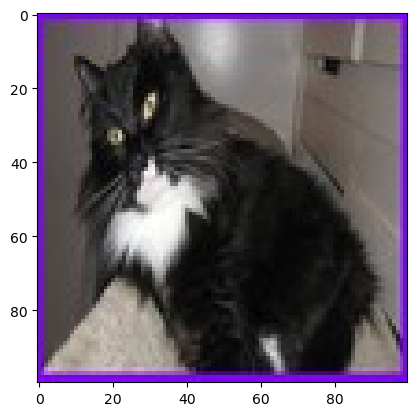

In [9]:
z = random.randint(0,len(x_train))
plt.imshow(x_train[z,:])
plt.show()

In [10]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape = (100 ,100 , 3)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(32,(3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dense(1 , activation = 'sigmoid'))

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.compile( loss='binary_crossentropy',optimizer = 'adam' , metrics =['accuracy'])

In [12]:
model.fit(x_train,y_train,epochs = 10 , batch_size=64)

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 119ms/step - accuracy: 0.5046 - loss: 0.7428
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 116ms/step - accuracy: 0.6206 - loss: 0.6689
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 115ms/step - accuracy: 0.6839 - loss: 0.6183
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 119ms/step - accuracy: 0.7393 - loss: 0.5543
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 123ms/step - accuracy: 0.7815 - loss: 0.4732
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 120ms/step - accuracy: 0.8414 - loss: 0.3816
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 121ms/step - accuracy: 0.8822 - loss: 0.2848
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 125ms/step - accuracy: 0.9105 - loss: 0.2312
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 128ms/step - accuracy: 0.9371 - loss: 0.1557
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 125ms/step - accuracy: 0.9711 - loss: 0.1156


In [13]:
model.evaluate(x_test,y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6059 - loss: 1.7006


[1.2581965923309326, 0.6725000143051147]

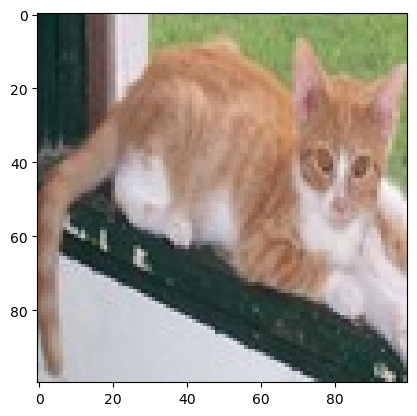

In [14]:
 test = random.randint(0,len(y_test))
plt.imshow(x_test[test,:])
plt.show()

In [15]:
pred = model.predict(x_test[test,:].reshape(1,100,100,3))
print(pred)
if(pred>0.5):
    pred=1
else:
    pred=0
print(pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
[[0.99140376]]
1


In [16]:
if(pred==0):
    print('Dog')
else:
    print('Cat')

Cat
